## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

## Loading the data

In [2]:
df = pd.read_csv('seattle_segmentation.csv')

In [3]:
df.shape

(3818, 33)

In [4]:
df1 = pd.read_csv('seattle.csv')

In [5]:
df1.shape

(3818, 92)

## Level-0 Analysis and Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   int64  
 3   host_name                         3816 non-null   object 
 4   host_since                        3816 non-null   object 
 5   host_is_superhost                 3816 non-null   object 
 6   host_listings_count               3816 non-null   float64
 7   host_total_listings_count         3816 non-null   float64
 8   host_has_profile_pic              3816 non-null   object 
 9   host_identity_verified            3816 non-null   object 
 10  is_location_exact                 3818 non-null   object 
 11  property_type                     3817 non-null   object 
 12  room_t

In [7]:
df.isnull().sum()

id                                     0
name                                   0
host_id                                0
host_name                              2
host_since                             2
host_is_superhost                      2
host_listings_count                    2
host_total_listings_count              2
host_has_profile_pic                   2
host_identity_verified                 2
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms                               6
beds                                   1
bed_type                               0
amenities                              0
square_feet                         3721
price                                  0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights  

In [8]:
df.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,956883,Maija,11-08-2011,f,3.0,3.0,t,t,...,1,365,207,95.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,21-02-2013,t,6.0,6.0,t,t,...,2,90,43,96.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,16708587,Jill,12-06-2014,f,2.0,2.0,t,t,...,4,30,20,97.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,9851441,Emily,06-11-2013,f,1.0,1.0,t,t,...,1,1125,0,NaN,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,1452570,Emily,29-11-2011,f,2.0,2.0,t,t,...,1,1125,38,92.0,f,strict,f,f,1,0.89


In [9]:
df1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [2]:
# import urllib.request
# from PIL import Image
  
# urllib.request.urlretrieve(
#   'https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png',
#    "gfg.png")
  
# img = Image.open("gfg.png")
# img.show()

In [11]:
cols = ['last_scraped','listing_url','picture_url','host_response_time','host_neighbourhood','neighbourhood_cleansed','city',
 'state','market','country','latitude','longitude','availability_365','cleaning_fee','security_deposit','calendar_last_scraped',]

In [12]:
df2 = df1[cols]

In [13]:
df3 = pd.concat([df,df2],axis=1)

In [14]:
df3.drop(['square_feet','review_scores_rating','reviews_per_month'],axis=1,inplace=True)

In [15]:
df3['cleaning_fee'].fillna('Not Available',inplace=True)
df3['security_deposit'].fillna('Not Available',inplace=True)

In [16]:
df3['host_response_time'].fillna('Unknown',inplace=True)

In [17]:
df3['host_neighbourhood'].fillna('Unknown',inplace=True)

In [18]:
df3.shape

(3818, 46)

In [19]:
df3.dropna(inplace=True)

In [20]:
df3.shape

(3793, 46)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 0 to 3817
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3793 non-null   int64  
 1   name                              3793 non-null   object 
 2   host_id                           3793 non-null   int64  
 3   host_name                         3793 non-null   object 
 4   host_since                        3793 non-null   object 
 5   host_is_superhost                 3793 non-null   object 
 6   host_listings_count               3793 non-null   float64
 7   host_total_listings_count         3793 non-null   float64
 8   host_has_profile_pic              3793 non-null   object 
 9   host_identity_verified            3793 non-null   object 
 10  is_location_exact                 3793 non-null   object 
 11  property_type                     3793 non-null   object 
 12  room_t

In [22]:
df3.to_csv('cleaned_seattle_data.csv')

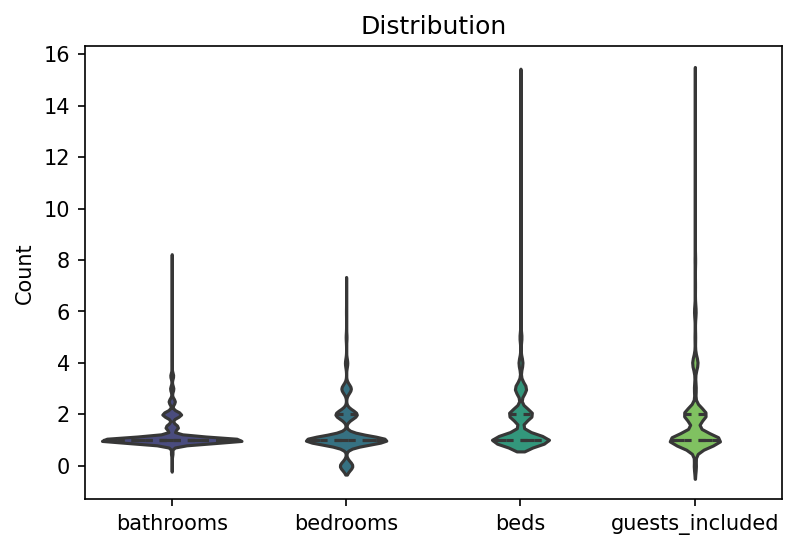

In [23]:
plt.figure(dpi=150)
sns.violinplot(data = df3[['bathrooms','bedrooms','beds','guests_included']],palette='viridis',inner='quartile')
plt.title('Distribution')
plt.ylabel('Count');

In [24]:
price = []
for i in df3.price:
    temp = 0
    if len(i) == 6 or len(i) == 7:
        temp = float(i[1:])
        price.append(temp)
    elif len(i) == 9:
        last = i[3:]
        first = i[1]
        complete = first+last
        temp = float(complete)
        price.append(temp)

In [25]:
df3['Price'] = price

In [26]:
df3.drop('price',axis=1,inplace=True)

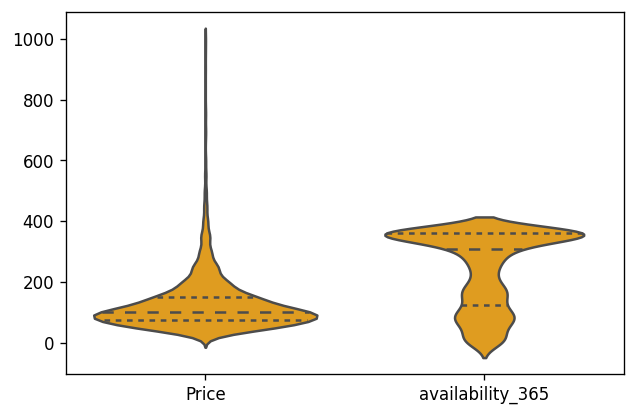

In [27]:
plt.figure(dpi=120)
sns.violinplot(data = df3[['Price','availability_365']],color='orange',inner='quartile');

In [28]:
d=[]
for i in df3['extra_people']:
    d.append(i.replace("$","").replace(",",""))
b  = [float(d) for d in d]
df3.drop('extra_people',axis=1)
df3['extra_people'] = b

In [29]:
df3.to_csv('seattle_data_final.csv')

In [30]:
df_dep = df3[df3.security_deposit != 'Not Available'].security_deposit
idx = df_dep.index

In [31]:
df_nb = df3[df3.index.isin(idx)].host_neighbourhood

In [32]:
d=[]
for i in df_dep:
    d.append(i.replace("$","").replace(",",""))
b  = [float(d) for d in d]
df_dep = pd.DataFrame(data=b,columns=['deposit'])

In [33]:
df_dep

,deposit
0,100.0
1,1000.0
2,700.0
3,150.0
4,150.0
...,...
1853,150.0
1854,500.0
1855,500.0
1856,250.0


In [34]:
df_p = pd.concat([df_dep,df_nb],axis=1)

### Neighbourhood with least security deposits

<AxesSubplot:xlabel='host_neighbourhood'>

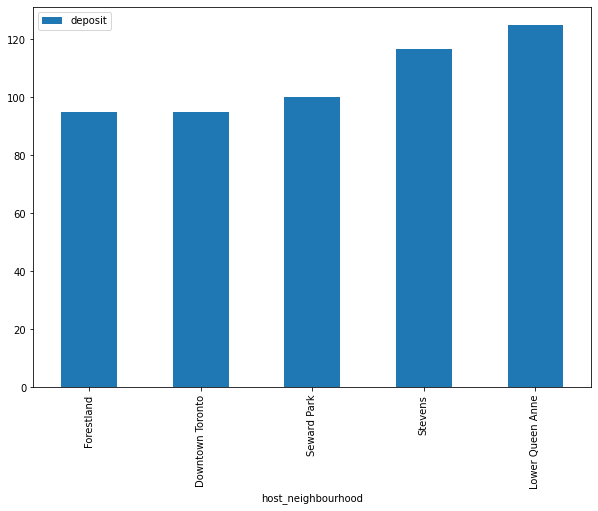

In [35]:
df_p.groupby(['host_neighbourhood']).mean().sort_values(by = 'deposit',ascending=True)[:5].plot(kind='bar',figsize=(10,7))

### Neighbourhoods with highest security deposits

<AxesSubplot:xlabel='host_neighbourhood'>

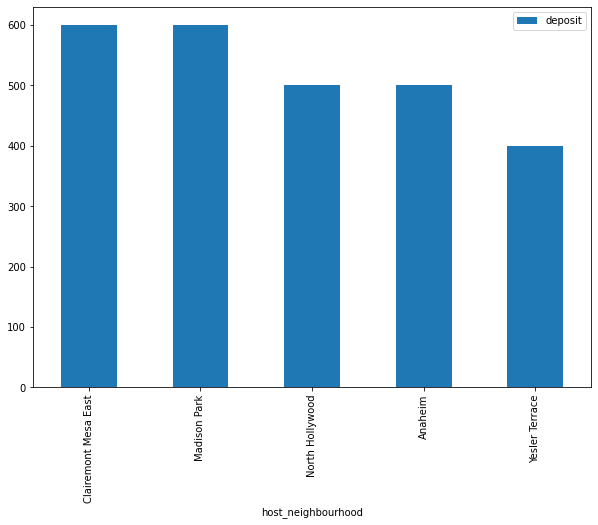

In [36]:
df_p.groupby(['host_neighbourhood']).mean().sort_values(by = 'deposit',ascending=False)[:5].plot(kind='bar',figsize=(10,7))

In [37]:
df_cln = df3[df3.cleaning_fee != 'Not Available'].cleaning_fee
df_neighbourhood = df3[df3.security_deposit != 'Not Available'].host_neighbourhood

In [38]:
d=[]
for i in df_cln:
    d.append(i.replace("$","").replace(",",""))
b  = [float(d) for d in d]
df_cln = pd.DataFrame(data=b,columns=['clean_fee'])

In [39]:
df_c = pd.concat([df_cln,df_nb],axis=1)

### Neighbourhood with least Cleaning Fee

<AxesSubplot:xlabel='host_neighbourhood'>

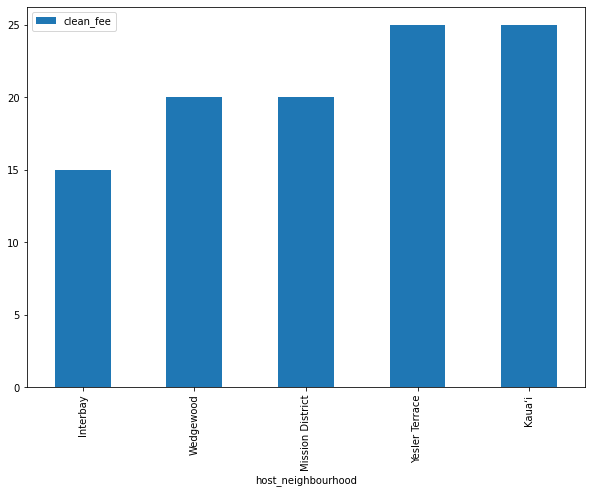

In [40]:
df_c.groupby(['host_neighbourhood']).mean().sort_values(by = 'clean_fee',ascending=True)[:5].plot(kind='bar',figsize=(10,7))

### Neighbourhood with Highest Cleaning Fee

<AxesSubplot:xlabel='host_neighbourhood'>

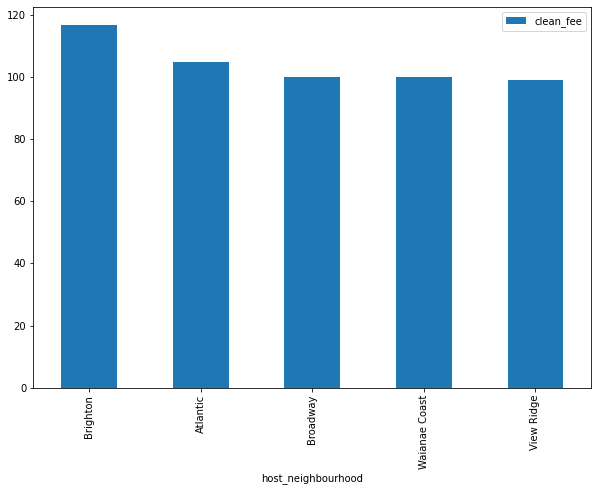

In [41]:
df_c.groupby(['host_neighbourhood']).mean().sort_values(by = 'clean_fee',ascending=False)[:5].plot(kind='bar',figsize=(10,7))

## Problem_Statement_4: Revenue Forecasting

### Selected Seattle city data for its revenue forecasting

In [42]:
df_ts = df3[['host_since','Price']]

In [43]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   host_since  3793 non-null   object 
 1   Price       3793 non-null   float64
dtypes: float64(1), object(1)
memory usage: 88.9+ KB


In [44]:
df_ts['host_since']=pd.to_datetime(df_ts['host_since'])

In [45]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3793 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   host_since  3793 non-null   datetime64[ns]
 1   Price       3793 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 88.9 KB


In [46]:
df_ts.head()

,host_since,Price
0,2011-11-08,85.0
1,2013-02-21,150.0
2,2014-12-06,975.0
3,2013-06-11,100.0
4,2011-11-29,450.0


In [47]:
idx1 = df_ts[(df_ts['host_since'] =='2016-01-01' )|(df_ts.host_since =='2016-02-01')|(df_ts.host_since =='2016-03-01')].index

In [48]:
len(idx1)

5

In [49]:
df_ts.shape

(3793, 2)

In [50]:
df_ts.drop(idx1,inplace=True)

In [51]:
df_ts.shape

(3788, 2)

In [52]:
df_ts.sort_values(by='host_since',inplace=True)

In [53]:
df_ts

,host_since,Price
2190,2008-10-11,48.0
2192,2008-10-11,50.0
2194,2008-10-11,100.0
3118,2009-02-09,82.0
2425,2009-02-09,137.0
...,...,...
1139,2015-12-22,90.0
2589,2015-12-27,90.0
118,2015-12-28,65.0
3085,2015-12-29,50.0


In [54]:
df_ts.set_index('host_since',inplace=True)

In [55]:
df_ts.head()

,Price
host_since,
2008-10-11,48.0
2008-10-11,50.0
2008-10-11,100.0
2009-02-09,82.0
2009-02-09,137.0


In [56]:
df_ts_sum = df_ts.resample(rule='MS').sum()

In [57]:
df_ts_sum.head()

,Price
host_since,
2008-10-01,198.0
2008-11-01,0.0
2008-12-01,0.0
2009-01-01,0.0
2009-02-01,2048.0


In [58]:
df_ts_sum.index.freq = 'MS'

In [59]:
df_ts_sum.index

DatetimeIndex(['2008-10-01', '2008-11-01', '2008-12-01', '2009-01-01',
               '2009-02-01', '2009-03-01', '2009-04-01', '2009-05-01',
               '2009-06-01', '2009-07-01', '2009-08-01', '2009-09-01',
               '2009-10-01', '2009-11-01', '2009-12-01', '2010-01-01',
               '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01',
               '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01',
               '2010-10-01', '2010-11-01', '2010-12-01', '2011-01-01',
               '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01',
               '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',
               '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01',
               '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01',
               '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
      

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

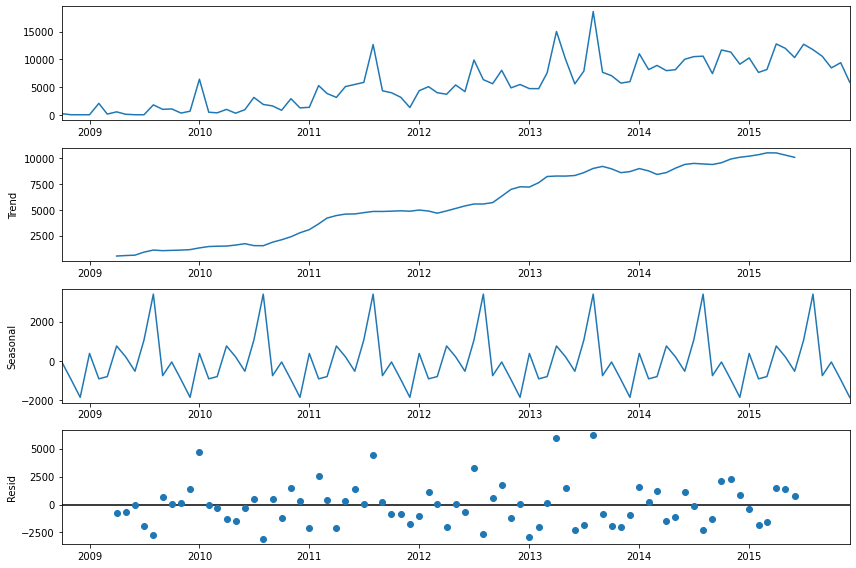

In [61]:
plt.rcParams["figure.figsize"] = (12,8)

result = seasonal_decompose(df_ts_sum.dropna(), model='add')
result.plot()
plt.show()

In [62]:
from statsmodels.graphics.tsaplots import month_plot

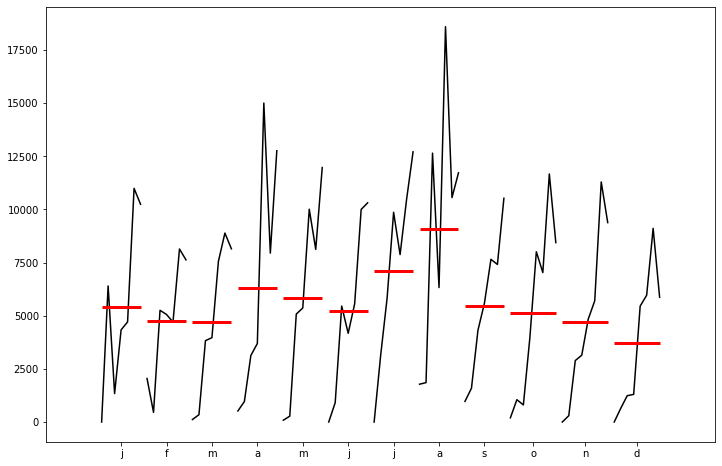

In [63]:
month_plot(df_ts_sum);

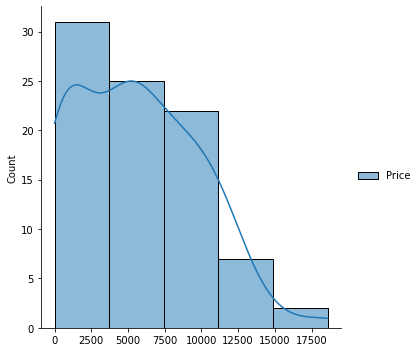

In [64]:
sns.displot(data=df_ts_sum,bins=5,kde=True);

<Figure size 1800x1200 with 0 Axes>

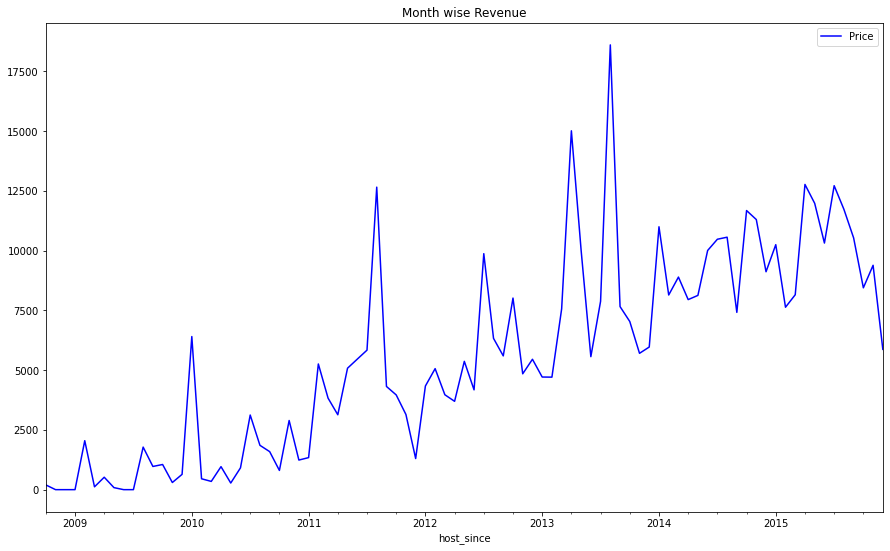

In [65]:
plt.figure(dpi=150)
df_ts_sum.plot(figsize=(15,9),c='b')
plt.title('Month wise Revenue')
plt.show()

In [66]:
len_train_data = round(len(df_ts_sum)*0.7)

In [67]:
len_train_data

61

In [68]:
train_data = df_ts_sum.iloc[:len_train_data]
test_data = df_ts_sum.iloc[len_train_data:]

In [69]:
len(train_data),len(test_data)

(61, 26)

### Model 1: Holt-Winters Method(Triple Smoothening Method)

In [70]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Price'],trend='add',seasonal='add',seasonal_periods=12).fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [71]:
fitted_model.summary()

Dep. Variable:,Price,No. Observations:,61
Model:,ExponentialSmoothing,SSE,378539433.204
Optimized:,True,AIC,986.098
Trend:,Additive,BIC,1019.872
Seasonal:,Additive,AICC,1002.384
Seasonal Periods:,12,Date:,"Thu, 28 Jul 2022"
Box-Cox:,False,Time:,11:00:46
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0757143,beta,True


In [72]:
hw_aic = round(fitted_model.aic,1)

In [73]:
hw_aic

986.1

In [74]:
hw_pred = fitted_model.forecast(26).rename('HW Predictions')

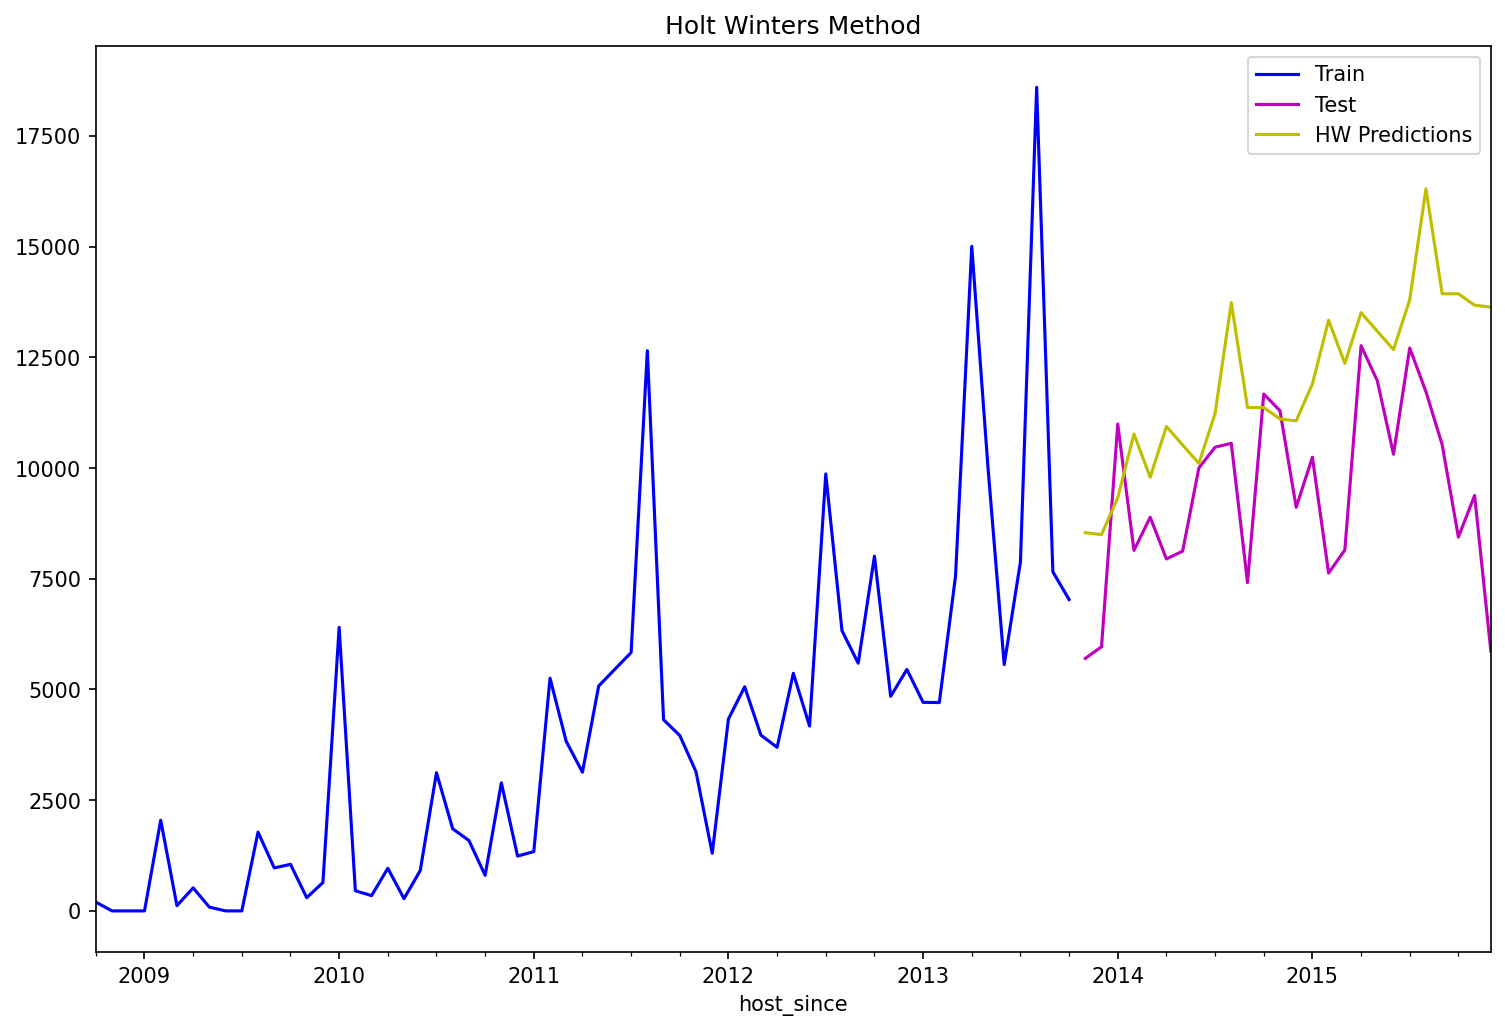

In [75]:
plt.figure(dpi=150)
train_data['Price'].plot(legend=True,label='Train',figsize=(12,8),c='b')
test_data['Price'].plot(legend=True,label='Test',c='m')
hw_pred.plot(legend=True,c='y')
plt.title('Holt Winters Method');

In [76]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [77]:
MAE_hw = mean_absolute_error(test_data['Price'],hw_pred)

In [78]:
MAE_hw

2647.9869607347637

In [79]:
#RMSE
RMSE_hw = np.sqrt(mean_squared_error(test_data['Price'],hw_pred))

In [80]:
RMSE_hw

3241.7150387620304

In [81]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

In [82]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [83]:
adf_test(df_ts_sum['Price'])

ADF Statistics: -1.4181405962348081
p- value: 0.5735490558649163
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### auto-ARIMA for best values of p,d,q

In [84]:
stepwise_fit = auto_arima(df_ts_sum['Price'],start_p=0,start_q=0,max_p=10,max_q=10,trace=True,seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1627.700, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1618.562, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1625.746, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1607.603, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1605.781, Time=0.02 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1603.498, Time=0.02 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1604.617, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1595.928, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1594.117, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 s

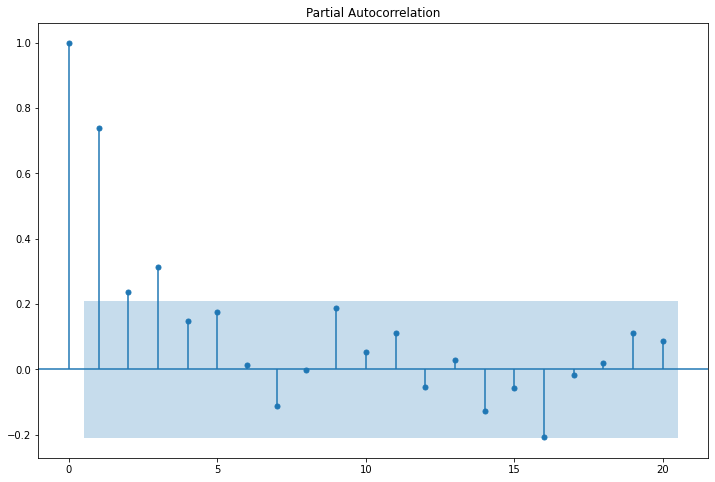

In [85]:
plot_pacf(df_ts_sum['Price'],lags=20);

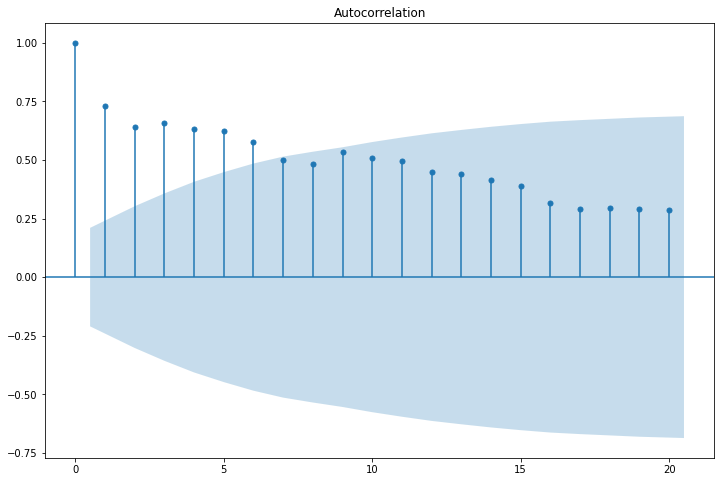

In [86]:
plot_acf(df_ts_sum['Price'],lags=20);

In [87]:
p = 3
d = 1
q = 1

## Model 2: SARIMA

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
import itertools
from itertools import product
from tqdm import tqdm_notebook

In [90]:
def optimize_SARIMA(parameters_list, d, D, s, data):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    results = []
    for param in tqdm_notebook(parameters_list):
        try:
            model = SARIMAX(data, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit()
        except:
            continue
        aic = model.aic
        results.append([param, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [91]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12

In [92]:
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [93]:
# result_df = optimize_SARIMA(parameters_list, 0, 0, 12, train_data['Price'])

In [94]:
p = 0
d = 1
q = 2
P = 0
D = 1
Q = 2
s = 12

In [95]:
sarima_model = SARIMAX(train_data['Price'],order=(p,d,q),seasonal_order=(P,D,Q,s))
sarima_result = sarima_model.fit()

In [96]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                   61
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -447.381
Date:                            Thu, 28 Jul 2022   AIC                            904.763
Time:                                    11:01:10   BIC                            914.119
Sample:                                10-01-2008   HQIC                           908.298
                                     - 10-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7047      0.244     -2.885      0.004      -1.183      -0.226
ma.L2         -0.2221      0.265     -0.839      0.402      -0.741       0.297
ma.S.L12      -0.9681      0.418     -2.315      0.021      -1.788      -0.148
ma.S.L24       0.6737      0.542      1.243      0.214      -0.389       1.736
sigma2      5.965e+06   2.25e+06      2.650      0.008    1.55e+06    1.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                18.33
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               3.64   Skew:                             1.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [98]:
sarima_pred = sarima_result.predict(start,end).rename("SARIMA Predictions")

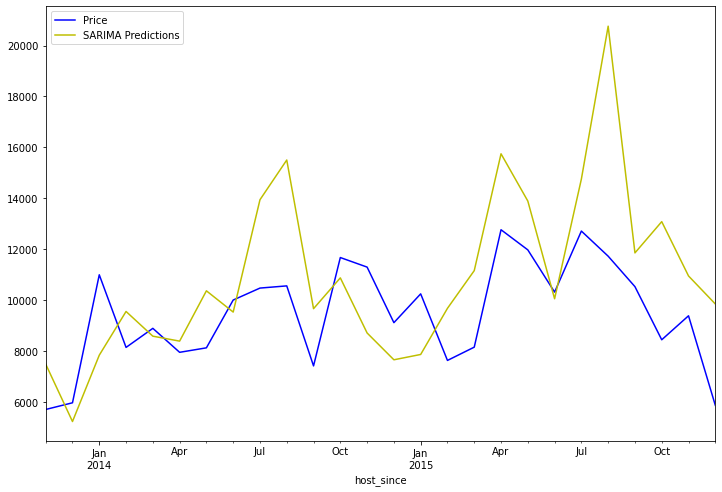

In [99]:
plt.figure(figsize=(9,6))
test_data['Price'].plot(figsize=(12,8),legend=True,c='b')
sarima_pred.plot(legend=True,c='y');

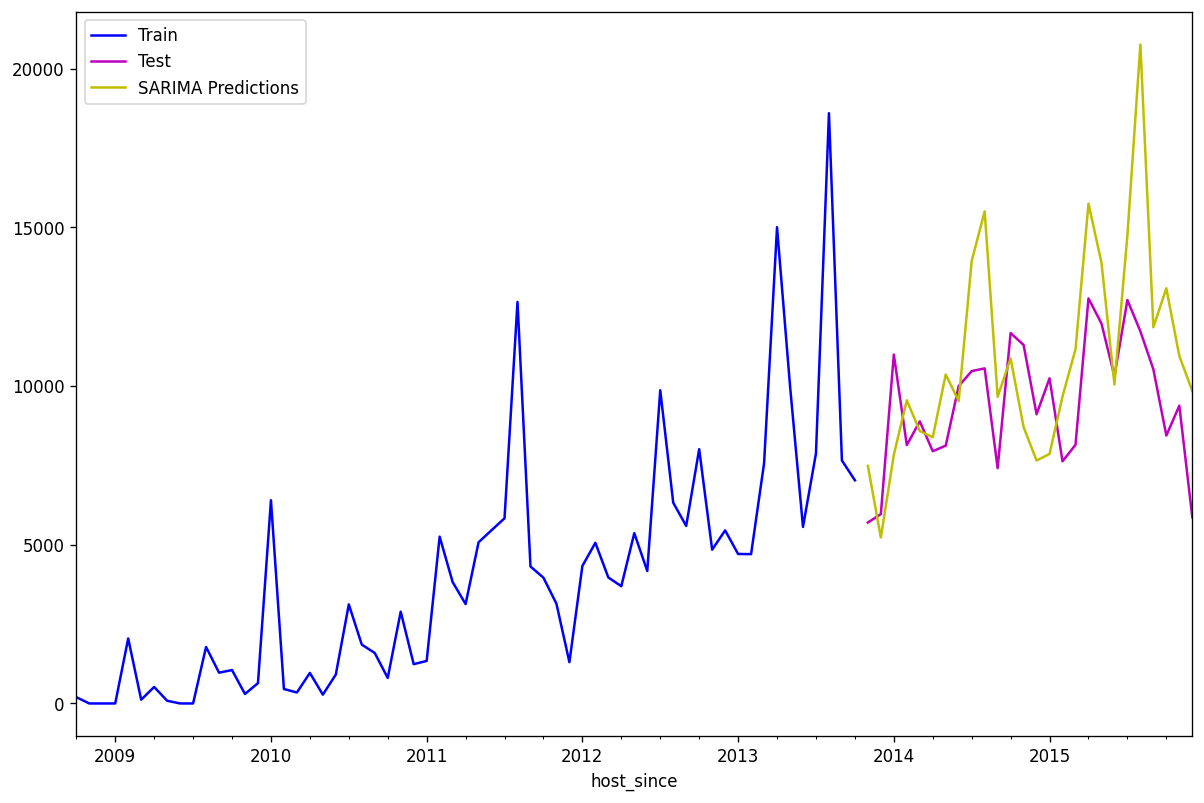

In [100]:
plt.figure(dpi=120)
train_data['Price'].plot(legend=True,label='Train',figsize=(12,8),c='b')
test_data['Price'].plot(legend=True,label='Test',c='m')
sarima_pred.plot(legend=True,c='y');

In [101]:
sarima_model_final = SARIMAX(df_ts_sum['Price'],order=(p,d,q),seasonal_order=(P,D,Q,s))
sarima_result = sarima_model_final.fit()

In [102]:
sarima_fcast = sarima_result.predict('2015-12-01','2016-12-01').rename("SARIMA Forecast")

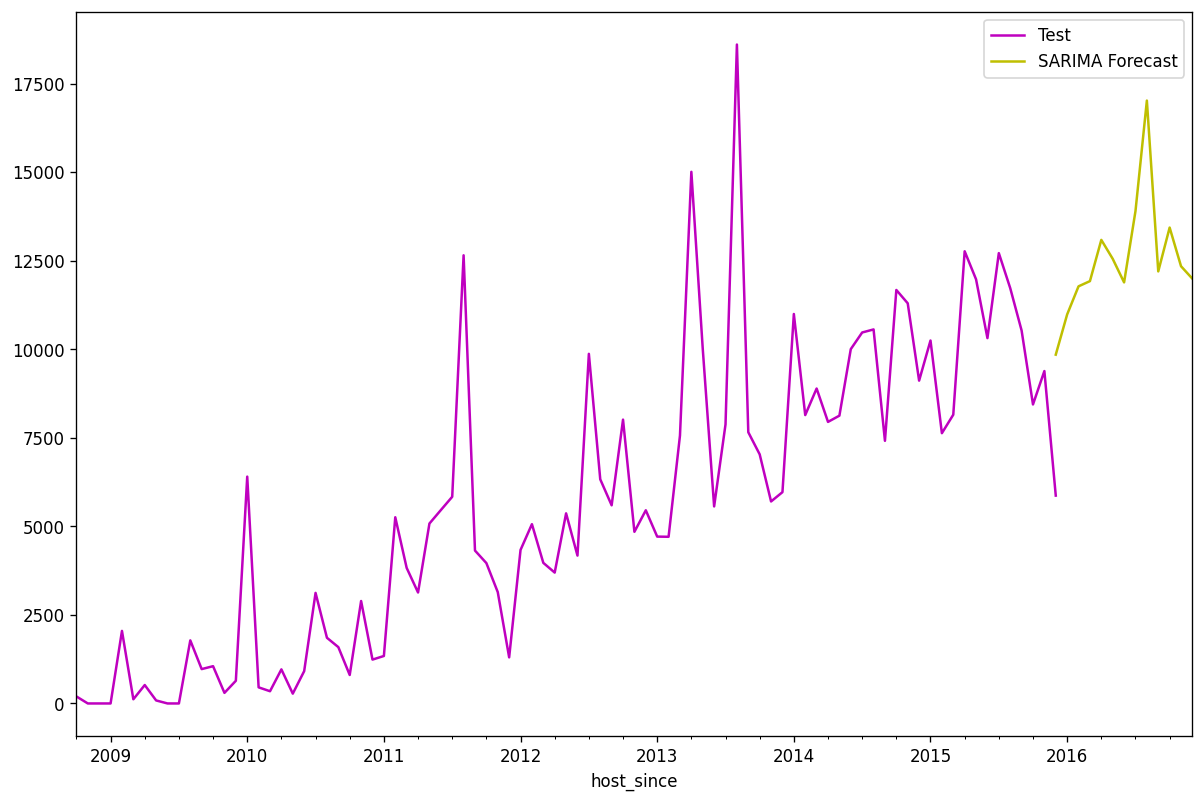

In [103]:
plt.figure(dpi=120)
df_ts_sum['Price'].plot(legend=True,label='Test',c='m')
sarima_fcast.plot(legend=True,c='y');

In [104]:
MAE_SARIMA = mean_absolute_error(test_data['Price'],sarima_pred)
MAE_SARIMA

2356.064714196586

In [105]:
RMSE_SARIMA = np.sqrt(mean_squared_error(test_data['Price'],sarima_pred))
RMSE_SARIMA

2982.4512001121516

In [106]:
sarima_aic = round(sarima_result.aic,1)
sarima_aic

1375.9

### Model 4: SARIMAX

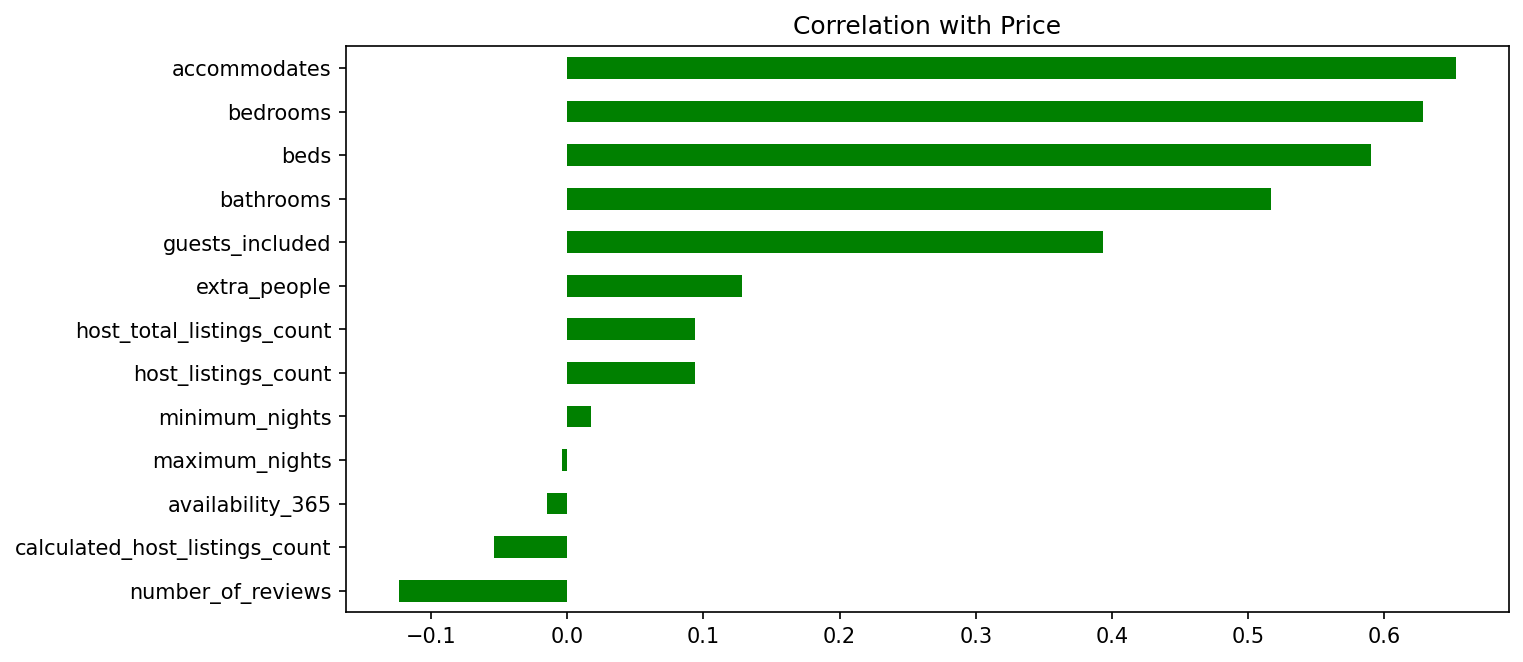

In [107]:
plt.subplots(dpi=150)
df3.corr()['Price'].drop(['host_id','id','Price','latitude','longitude']).sort_values().plot(kind='barh',color='green',figsize=(10,5))
plt.title('Correlation with Price');

In [108]:
df_tsx = df3[['host_since','Price','accommodates','bathrooms','bedrooms','beds','guests_included']]

In [109]:
df_tsx.head()

,host_since,Price,accommodates,bathrooms,bedrooms,beds,guests_included
0,11-08-2011,85.0,4,1.0,1.0,1.0,2
1,21-02-2013,150.0,4,1.0,1.0,1.0,1
2,12-06-2014,975.0,11,4.5,5.0,7.0,10
3,06-11-2013,100.0,3,1.0,0.0,2.0,1
4,29-11-2011,450.0,6,2.0,3.0,3.0,6


In [110]:
df_tsx['host_since']=pd.to_datetime(df_tsx['host_since'])

In [111]:
idx1 = df_tsx[(df_tsx['host_since'] =='2016-01-01' )|(df_tsx.host_since =='2016-02-01')|(df_tsx.host_since =='2016-03-01')].index

In [112]:
len(idx1)

5

In [113]:
df_tsx.drop(idx1,inplace=True)

In [114]:
df_tsx.shape

(3788, 7)

In [115]:
df_tsx.sort_values('host_since',inplace=True)

In [116]:
df_tsx.set_index('host_since',inplace=True)

In [117]:
df_tsx_sum = df_tsx.resample(rule='MS').sum()

In [118]:
df_tsx_sum.index.freq = 'MS'

In [119]:
df_tsx_sum.head()

,Price,accommodates,bathrooms,bedrooms,beds,guests_included
host_since,,,,,,
2008-10-01,198.0,6,3.0,3.0,3.0,4
2008-11-01,0.0,0,0.0,0.0,0.0,0
2008-12-01,0.0,0,0.0,0.0,0.0,0
2009-01-01,0.0,0,0.0,0.0,0.0,0
2009-02-01,2048.0,61,23.5,24.0,32.0,43


In [120]:
train = df_tsx_sum.iloc[:len_train_data]
test = df_tsx_sum.iloc[len_train_data:]

In [121]:
len(train),len(test)

(61, 26)

In [122]:
exog_train = train[['accommodates','bathrooms','bedrooms','beds','guests_included']]
exog_test = test[['accommodates','bathrooms','bedrooms','beds','guests_included']]

In [123]:
sarimax_model = SARIMAX(train.Price, order=(p,d,q), seasonal_order=(P,D,Q,s), exog = exog_train.values).fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [124]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                   61
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -387.300
Date:                            Thu, 28 Jul 2022   AIC                            794.600
Time:                                    11:02:27   BIC                            813.312
Sample:                                10-01-2008   HQIC                           801.671
                                     - 10-01-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            24.4568     26.276      0.931      0.352     -27.044      75.958
x2            22.5953     49.458      0.457      0.648     -74.341     119.532
x3            24.8862     56.244      0.442      0.658     -85.350     135.123
x4           -18.5202     43.992     -0.421      0.674    -104.742      67.702
x5             4.4259     23.891      0.185      0.853     -42.399      51.250
ma.L1         -0.9168      0.556     -1.648      0.099      -2.007       0.174
ma.L2         -0.0822      0.388     -0.212      0.832      -0.843       0.679
ma.S.L12      -0.6790      0.578     -1.174      0.240      -1.812       0.454
ma.S.L24       0.3003      0.745      0.403      0.687      -1.160       1.760
sigma2      8.011e+05      0.000    6.8e+09      0.000    8.01e+05    8.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.12
Prob(Q):                              0.92   Prob(JB):                         0.13
Heteroskedasticity (H):               4.14   Skew:                             0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.83e+26. Standard errors may be unstable.
"""

In [125]:
sarimax_pred = sarimax_model.predict(start,end, exog=exog_test.values).rename("SARIMAX Predictions")

<Figure size 648x432 with 0 Axes>

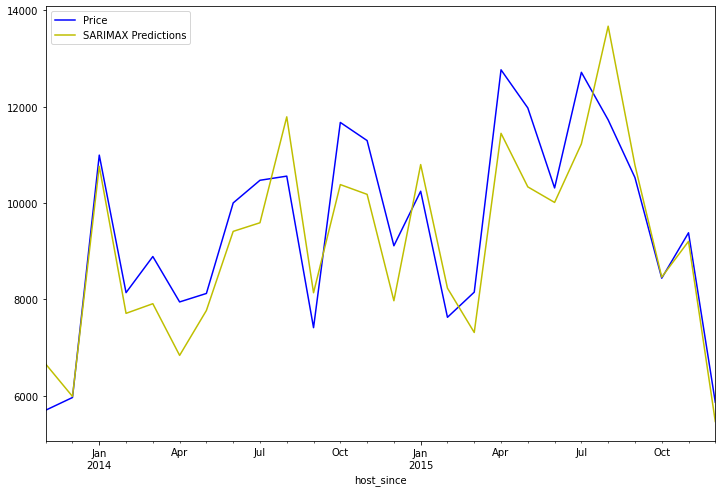

In [126]:
plt.figure(figsize=(9,6))
plt.figure(figsize=(9,6))
test['Price'].plot(figsize=(12,8),legend=True,c='b')
sarimax_pred.plot(legend=True,c='y');

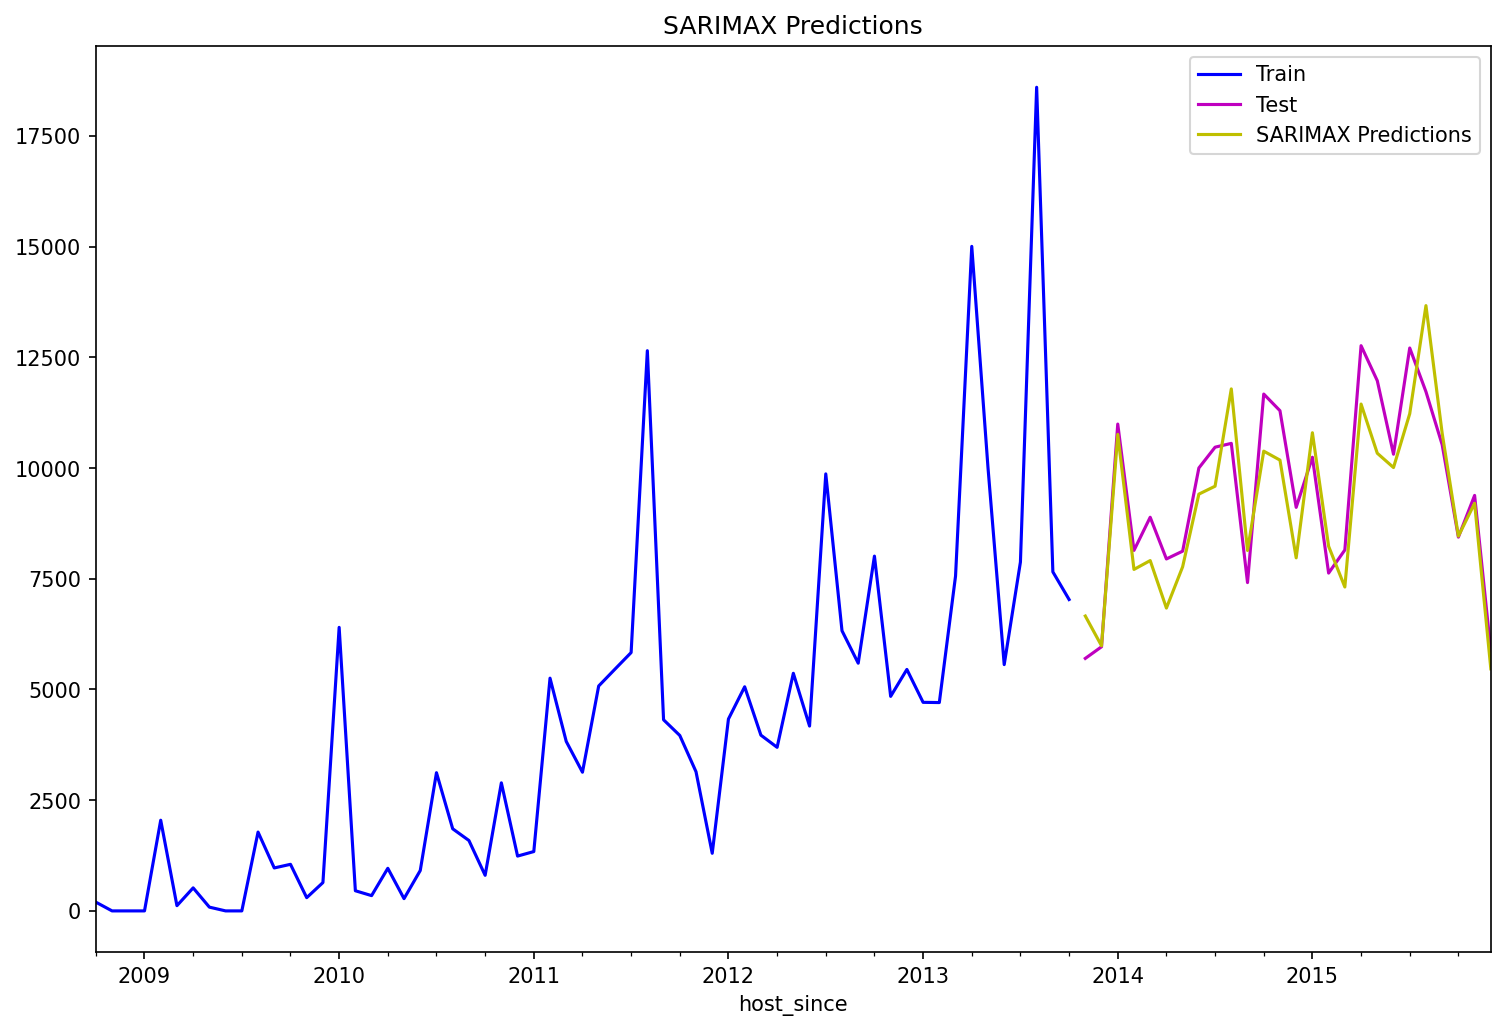

In [127]:
plt.figure(figsize=(15,9),dpi=150)

train['Price'].plot(legend=True,label='Train',figsize=(12,8),c='b')
test['Price'].plot(legend=True,label='Test',c='m')
sarimax_pred.plot(legend=True,c='y')
plt.title('SARIMAX Predictions');

In [128]:
MAE_SARIMAX = mean_absolute_error(test['Price'],sarimax_pred)
MAE_SARIMAX

791.9881909253683

In [129]:
#RMSE
RMSE_SARIMAX = np.sqrt(mean_squared_error(test['Price'],sarimax_pred))
RMSE_SARIMAX

939.7739451416444

In [130]:
sarimax_model_aic = round(sarimax_model.aic,1)
sarimax_model_aic

794.6

In [131]:
list_aic = [hw_aic,sarima_aic,sarimax_model_aic]
list_aic

[986.1, 1375.9, 794.6]

In [132]:
list_mae = [MAE_hw,MAE_SARIMA,MAE_SARIMAX]
list_mae

[2647.9869607347637, 2356.064714196586, 791.9881909253683]

In [133]:
list_rmse = [RMSE_hw,RMSE_SARIMA,RMSE_SARIMAX]
list_rmse

[3241.7150387620304, 2982.4512001121516, 939.7739451416444]

In [134]:
df_final = pd.DataFrame(data=list_aic,index=['Holt-Winters','SARIMA','SARIMAX'])

In [135]:
df_final.rename(columns={0:'AIC'},inplace=True)

In [136]:
df_final['Mean Absolute Error'] = list_mae
df_final['Root Mean Squared Error'] = list_rmse

### Conclusions:

In [137]:
df_final

,AIC,Mean Absolute Error,Root Mean Squared Error
Holt-Winters,986.1,2647.986961,3241.715039
SARIMA,1375.9,2356.064714,2982.451200
SARIMAX,794.6,791.988191,939.773945


### Conclusion: From the comparison DataFrame, for the Seattle dataset taken, SARIMAX model algorithm has yielded minimum error and AIC and thus we can finalize SARIMAX model for revenue forecasting.

## Forecasting using SARIMAX

In [138]:
exog_total = df_tsx_sum.drop('Price',axis=1)

<AxesSubplot:>

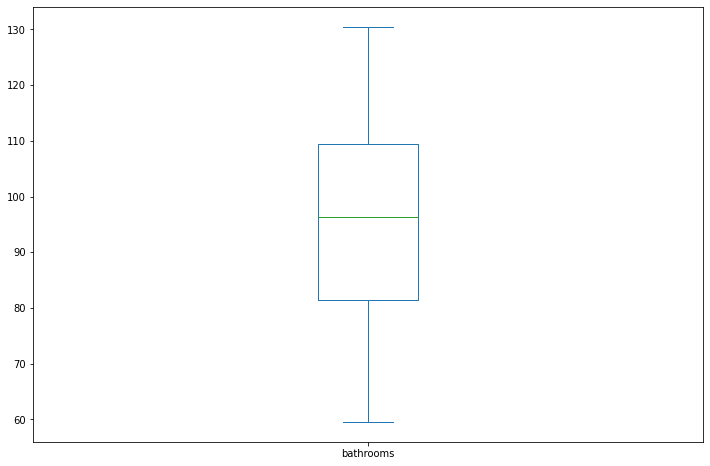

In [139]:
test['bathrooms'].plot(kind='box')

In [140]:
forecast_dates = pd.date_range(start='2016-01-01',end='2016-12-01', freq='MS')

In [141]:
accommodates_range = np.random.randint(150,360,12)
accommodates_range

array([324, 212, 185, 258, 209, 174, 319, 353, 295, 210, 271, 344])

In [142]:
bathrooms_range = np.random.randint(60,130,12)
bathrooms_range

array([ 93,  75,  79,  78, 102,  90, 121,  68, 126,  80,  73,  82])

In [143]:
bedrooms_range = np.random.randint(58,137,12)
bedrooms_range

array([124, 114, 114, 105,  86, 126,  59, 125,  67,  66,  60, 120])

In [144]:
beds_range = np.random.randint(83,191,12)
beds_range

array([183,  86, 188, 100,  98, 120, 135, 113, 151, 164,  89,  89])

In [145]:
guests_included_range = np.random.randint(79,177,12)
guests_included_range

array([161, 122, 170, 134, 128, 105, 111, 174, 141, 146, 166,  91])

In [146]:
exog_forecast = pd.DataFrame(data=[accommodates_range,bathrooms_range,bedrooms_range,beds_range,guests_included_range],columns=[forecast_dates],index = ['Accommodates','bathrooms','bedrooms','beds','guests_included']).transpose()

In [147]:
exog_forecast.reset_index(inplace=True)

In [148]:
exog_forecast.columns

Index(['level_0', 'Accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included'],
      dtype='object')

In [149]:
exog_forecast.rename(columns = {'level_0':'forecast_dates'},inplace=True)

In [150]:
exog_forecast.set_index('forecast_dates',inplace=True)

In [151]:
sarimax_model_final = SARIMAX(df_tsx_sum.Price, order=(p,d,q), seasonal_order=(P,D,Q,s), exog = exog_total.values).fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [152]:
fcast_sarimax = sarimax_model_final.predict('2015-12-01','2016-12-01', exog=exog_forecast.values).rename("SARIMAX Forecast")

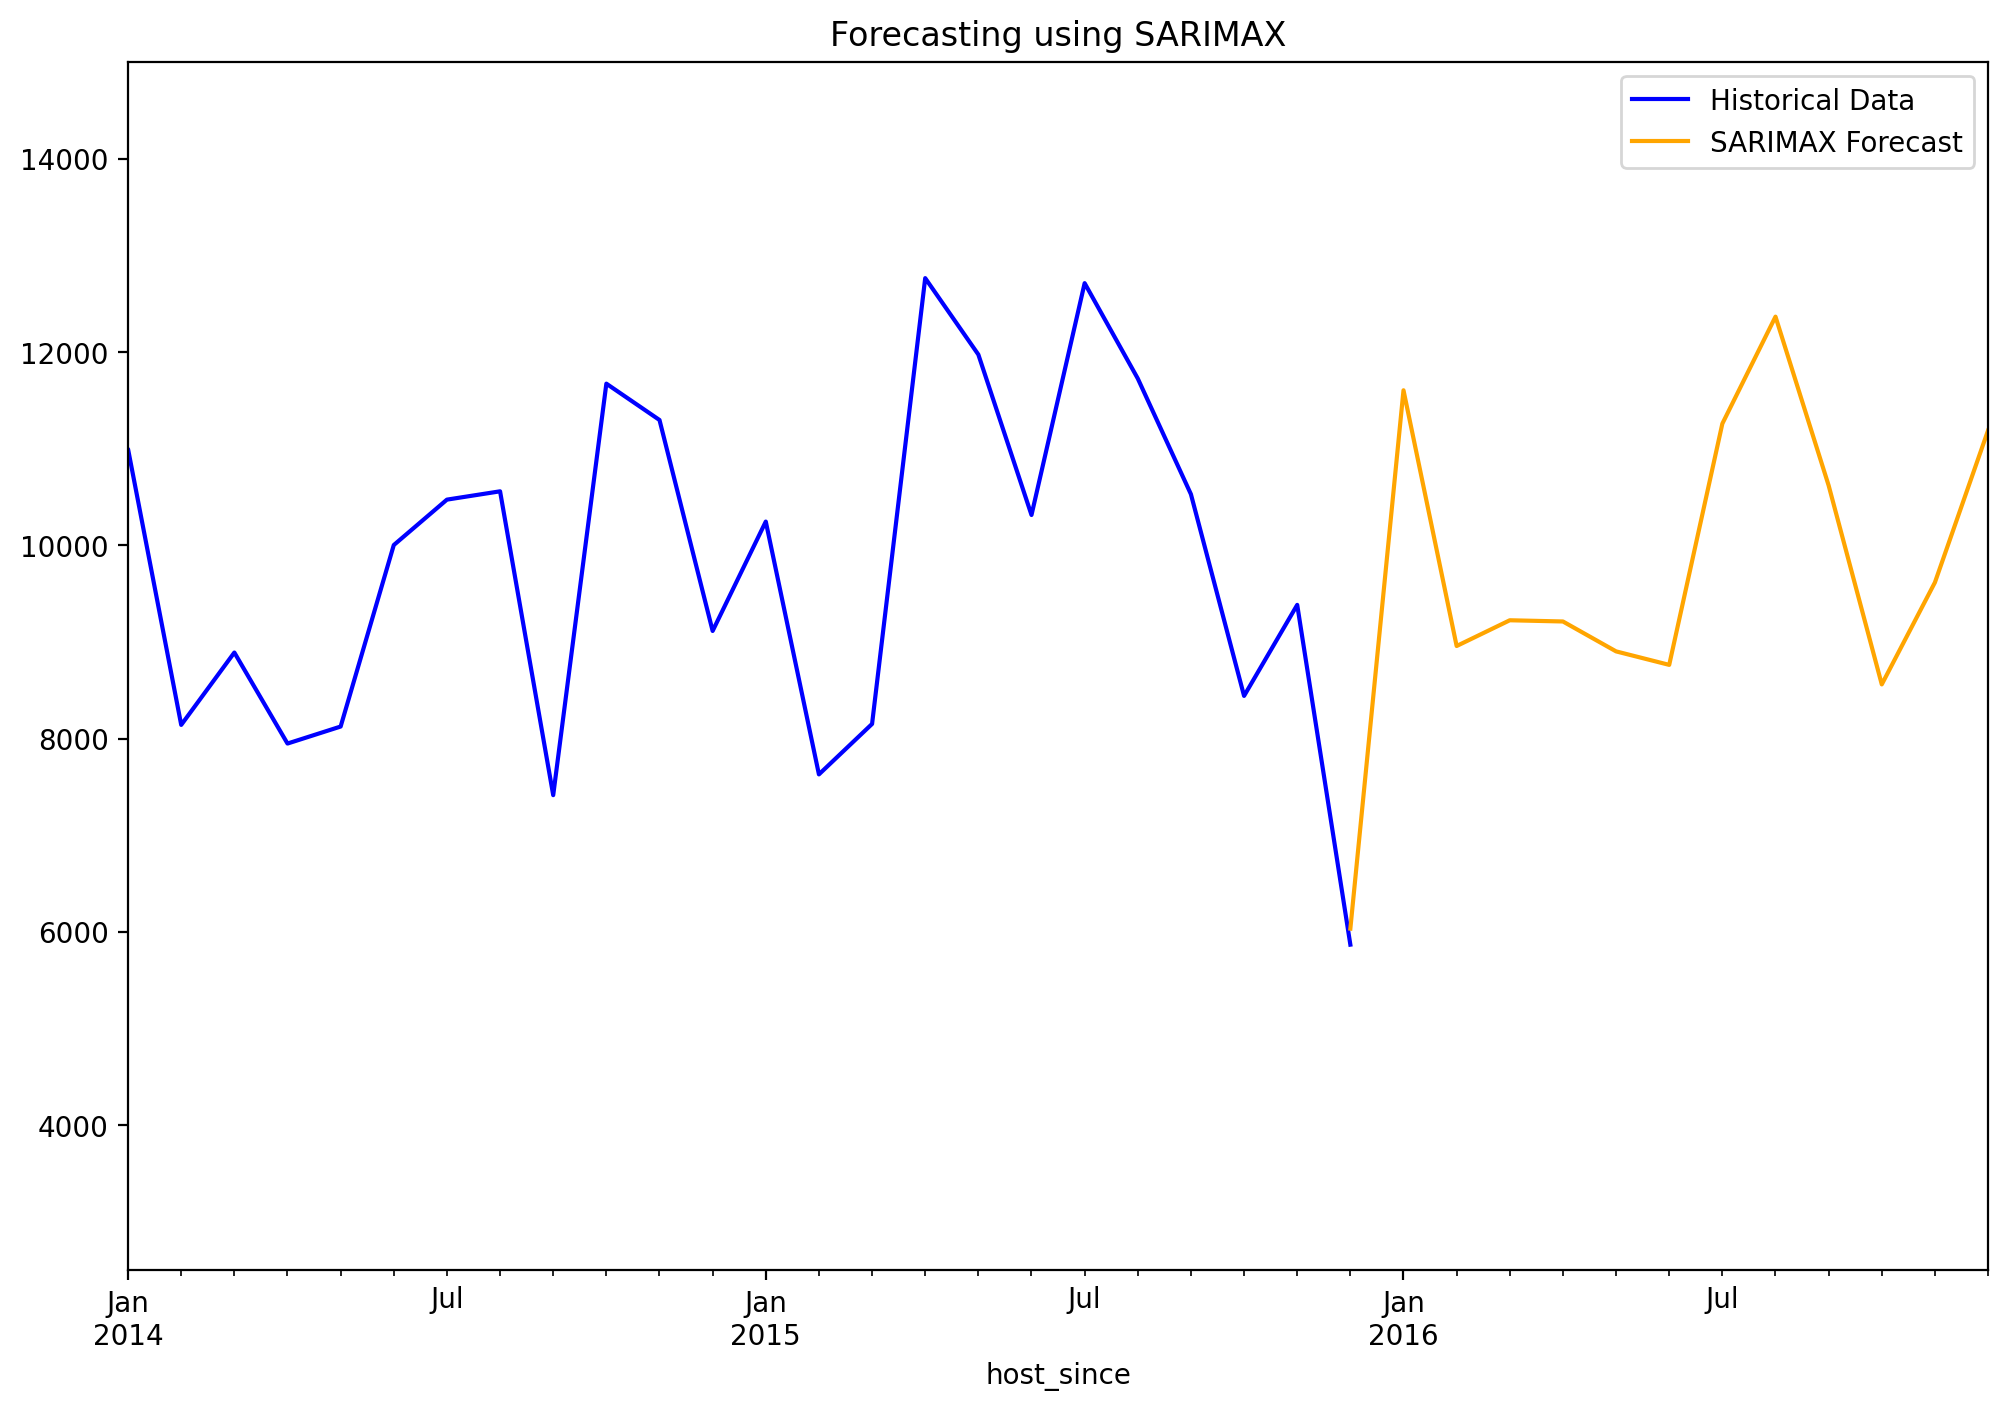

In [153]:
plt.figure(figsize=(15,9),dpi=200)
df_tsx_sum['Price'].plot(legend=True,label='Historical Data',figsize=(12,8),c='b')
fcast_sarimax.plot(legend=True,c='orange')
plt.title('Forecasting using SARIMAX')
plt.xlim('2014-01-01','2016-12-01')
plt.ylim(2500,15000);

In [154]:
fcast_sarimax

2015-12-01     6032.882914
2016-01-01    11603.486227
2016-02-01     8957.322038
2016-03-01     9223.689735
2016-04-01     9211.163822
2016-05-01     8901.727992
2016-06-01     8762.080514
2016-07-01    11258.187532
2016-08-01    12365.383357
2016-09-01    10618.420191
2016-10-01     8560.049697
2016-11-01     9615.419606
2016-12-01    11188.155856
Freq: MS, Name: SARIMAX Forecast, dtype: float64

### 1.Identify if there are any trends and seasons when travelers book these accommodations:

### From the seasonal decomposition and month_plot we can see that there is an overall upward trend showing rise in bookings of these accomodations and the seasonality shows that more bookings were done in the month's of July and August maybe due to the warm weather and especially to attend Seafair festival where people majorly come to watch the hydroplane races and the Blue Angels( a flight demonstration squadron of the United States Navy) which is a Seattle tradition.

### 2.Does this business model also indicate trends that shows demand for these houses ?

### Yes SARIMAX model is able to indicate the trends and seasonality of the demands for the houses.

## Problem_Statement_5: Prediction of property_type:

host_is_superhost, host_total_listings_count, room_type, accommodates, 'bathrooms', 'bedrooms', 'beds', 'bed_type', number_of_reviews, instant_bookable, cancellation_policy, host_response_time, availability_365, Price

In [155]:
df4 = df3.drop(['id','host_id','latitude','longitude'],axis=1)

In [156]:
df3.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'last_scraped', 'listing_url',
       'picture_url', 'host_response_time', 'host_neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'market', 'country',
       'latitude', 'longitude', 'availability_365', 'cleaning_fee',
       'security_deposit', 'calendar_last_scraped', 'Price'],
      dtype='object')

# ATTENTION ---------------------------

In [157]:
df5 = df4[['listing_url','picture_url','host_is_superhost', 'host_total_listings_count', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'number_of_reviews', 'instant_bookable', 'cancellation_policy', 'host_response_time', 'availability_365', 'Price','property_type']]

In [158]:
df5['property_type'].replace(to_replace =['Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
                 value ="Others",inplace=True)

In [159]:
df5.property_type.unique()

array(['Apartment', 'House', 'Others'], dtype=object)

In [160]:
df5.property_type.value_counts()

House        1723
Apartment    1696
Others        374
Name: property_type, dtype: int64

In [161]:
df5.select_dtypes(exclude=['int','float']).columns

Index(['listing_url', 'picture_url', 'host_is_superhost', 'room_type',
       'bed_type', 'instant_bookable', 'cancellation_policy',
       'host_response_time', 'property_type'],
      dtype='object')

In [162]:
df_dummies = pd.get_dummies(df5[['host_is_superhost', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'host_response_time']],drop_first=True)

In [163]:
df6 = pd.concat([df5,df_dummies],axis=1).drop(['host_is_superhost', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'host_response_time'],axis=1)

In [164]:
df6.columns

Index(['listing_url', 'picture_url', 'host_total_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',
       'availability_365', 'Price', 'property_type', 'host_is_superhost_t',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'instant_bookable_t', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object')

In [165]:
X = df6.drop('property_type',axis=1)
y = df6['property_type']

### Feature Selector Algorithms

In [166]:
def ExtraTree_Selector(X,y):
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier()
    model.fit(X, y)
    print(model.feature_importances_)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values().plot(kind='barh');
    plt.show()
    list1=feat_importances.keys().to_list()
    return list1,feat_importances

In [167]:
def forward_selector(X,y,k):
    from sklearn.ensemble import RandomForestClassifier
    from mlxtend.feature_selection import SequentialFeatureSelector
    forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
               k_features=k,
               forward=True,
               verbose=2,
               scoring='accuracy',
               cv=5)
    fselector = forward_feature_selector.fit(X,y)
    print(fselector.k_feature_names_)

In [168]:
def chi2_selector(X,y,k):
    from sklearn.feature_selection import SelectKBest, chi2
    chi2_features = SelectKBest(chi2, k = k) 
    X_kbest_features = chi2_features.fit_transform(X, y)
    mask=chi2_features.get_support()
    new_feature=[]
    for bool,feature in zip(mask,X.columns):
        if bool:
            new_feature.append(feature)
    list3=new_feature
    print(list3)

### Classifiers

## logistic regression

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(pred_labels, true_labels, labels=range(len(label_list)))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)
# disp.plot()

In [170]:
def log_function(X,y):
    scaler = StandardScaler()
    penalty = ['l1', 'l2']
    C = np.logspace(0, 1,10) 
    param_grid = {'penalty':penalty,'C':C}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    log_model = LogisticRegression(max_iter=5000)
    grid_model1 = GridSearchCV(estimator=log_model,param_grid=param_grid,cv=5)
    grid_model1.fit(scaled_X_train,y_train)
    print(grid_model1.best_score_)
    print(f'Best Parameters: {grid_model1.best_params_}\n')
    y_pred1 = grid_model1.predict(scaled_X_test)
    print(classification_report(y_test,y_pred1))

## KNN

In [171]:
def knn_function(X,y):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    knn = KNeighborsClassifier()
    operations = [('scaler',scaler),('knn',knn)]
    from sklearn.pipeline import Pipeline
    pipe = Pipeline(operations)   ## our model to be passed as estimator for GridSearchCV
    k_values = list(range(1,20))
    param_grid = {'knn__n_neighbors': k_values}
    full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
    full_cv_classifier.fit(X_train,y_train)
    full_cv_classifier.best_estimator_.get_params()
    ## Elbow Method to find optimal K

    test_error_rates = []


    for k in range(1,20):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train,y_train) 

        y_pred_test = knn_model.predict(X_test)

        test_error = 1 - accuracy_score(y_test,y_pred_test)
        test_error_rates.append(test_error)

    plt.figure(figsize=(10,6),dpi=200)
    plt.plot(range(1,20),test_error_rates,label='Test Error')
    plt.legend()
    plt.ylabel('Error Rate')
    plt.xlabel("K Value")

    
    knn= KNeighborsClassifier(n_neighbors=19)
    operations = [('scaler',scaler),('knn',knn)]

    pipe = Pipeline(operations)
    pipe.fit(X_train,y_train)
    pipe_pred = pipe.predict(X_test)
    
    print(classification_report(y_test,pipe_pred))
    print(accuracy_score(y_test, pipe_pred))

## SVC

In [172]:
def svc_function(X,y):
    from sklearn.svm import SVC # Support Vector Classifier
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    from sklearn.preprocessing import StandardScaler  # Using standardization for scaling feature
    scaler = StandardScaler()          # Created an instance of our StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)        # Fit-Transforming our training set
    scaled_X_test = scaler.transform(X_test)      # Transforming our test set
    svm = SVC()
    param_grid1 = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
    grid_model2 = GridSearchCV(svm,param_grid1,cv=5)
    grid_model2.fit(scaled_X_train,y_train)
    print(grid_model2.best_params_)
    y_pred2 = grid_model2.predict(scaled_X_test)
    print(classification_report(y_test,y_pred2))
    print(grid_model2.best_score_)

## RandomForestClassifier .

In [173]:
def randomforest(X,y):
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier()
    test_error = []
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    from sklearn.preprocessing import StandardScaler  # Using standardization for scaling feature
    scaler = StandardScaler()          # Created an instance of our StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)        # Fit-Transforming our training set
    scaled_X_test = scaler.transform(X_test)      # Transforming our test set

    for n in range(1,40):
        # Use n random trees
        model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
        model.fit(scaled_X_train,y_train)
        test_preds = model.predict(scaled_X_test)
        test_error.append(1-accuracy_score(test_preds,y_test))

    plt.plot(range(1,40),test_error,label='Test Error')
    plt.legend()

    n_estimators=list(range(10,40))
    max_features= list(range(2,5))
    bootstrap = [True,False]
    
    

    param_grid2 = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap}

    grid_model3 = GridSearchCV(rfc,param_grid2,cv=5)
    grid_model3.fit(scaled_X_train,y_train)
    print(grid_model3.best_params_)
    print(classification_report(y_test,test_preds))
    print(grid_model3.best_score_)

## GradientBoostingClassifier

In [174]:
def gradient_boost_function(X,y):
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    from sklearn.preprocessing import StandardScaler  # Using standardization for scaling feature
    scaler = StandardScaler()          # Created an instance of our StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)        # Fit-Transforming our training set
    scaled_X_test = scaler.transform(X_test)      # Transforming our test set
    gb_model = GradientBoostingClassifier()
    param_grid3 = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
    grid_model4 = GridSearchCV(gb_model,param_grid3,cv=5)
    grid_model4.fit(scaled_X_train,y_train)
    print(grid_model4.best_params_)
    y_pred6 = grid_model4.predict(scaled_X_test)
    print(y_pred6)
    print(classification_report(y_test,y_pred6))
    print(grid_model4.best_score_)

## AdaBoostClassifier

In [221]:
def adaboost_function(X,y):
    from sklearn.ensemble import AdaBoostClassifier
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    from sklearn.preprocessing import StandardScaler  # Using standardization for scaling feature
    scaler = StandardScaler()          # Created an instance of our StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)        # Fit-Transforming our training set
    scaled_X_test = scaler.transform(X_test)      # Transforming our test set

    error_rates = []
    for n in range(1,20):

        model = AdaBoostClassifier(n_estimators=n)
        model.fit(scaled_X_train,y_train)
        preds = model.predict(scaled_X_test)
        err = 1 - accuracy_score(y_test,preds)

        error_rates.append(err)
    plt.plot(range(1,20),error_rates)
    
    model = AdaBoostClassifier(n_estimators=17)
    model.fit(scaled_X_train,y_train)
    y_pred5 = model.predict(scaled_X_test)
    print(accuracy_score(y_test, y_pred5))
    print(classification_report(y_test,y_pred5))

### Goal: Binary classification

In [176]:
df4.property_type.value_counts()

House              1723
Apartment          1696
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Cabin                21
Other                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Yurt                  1
Chalet                1
Name: property_type, dtype: int64

House : Townhouse, Loft, Camper/RV, Cabin, Bungalow, Boat, Treehouse, Bed&Breakfast, Tent, House, Yurt, Chalet

Apartment: Condominium, Dorm

In [177]:
df4.shape

(3793, 42)

In [178]:
index1 = df4[df4.property_type == 'Other'].index

In [179]:
df4.drop(index1,axis=0,inplace=True)

In [180]:
df4['property_type'].replace(to_replace =['Condominium','Dorm'],
                 value ="Apartment",inplace=True)

In [181]:
df4['property_type'].replace(to_replace =['Townhouse', 'Loft', 'Camper/RV', 'Cabin', 'Bungalow', 'Boat', 'Treehouse',
                                             'Bed & Breakfast', 'Tent', 'House', 'Yurt', 'Chalet'],
                 value ="House",inplace=True)

In [182]:
df4.property_type.value_counts()

House        1983
Apartment    1789
Name: property_type, dtype: int64

# ATTENTION -----------------

In [183]:
df4 = df4[['listing_url','picture_url','host_is_superhost', 'host_total_listings_count', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
        'number_of_reviews', 'instant_bookable', 'cancellation_policy', 'host_response_time', 'availability_365', 'Price','property_type']]

# ATTENTION

In [184]:
dfurl = df4.copy()

In [185]:
df_dummies = pd.get_dummies(df4[['host_is_superhost', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'host_response_time']],drop_first=True)

In [186]:
df_v = pd.concat([df4,df_dummies],axis=1).drop(['host_is_superhost', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'host_response_time'],axis=1)

In [187]:
df_v.drop(['listing_url','picture_url'],axis=1,inplace=True)

In [188]:
X = df_v.drop('property_type',axis=1)
y = df_v['property_type']

In [189]:
df4.columns

Index(['listing_url', 'picture_url', 'host_is_superhost',
       'host_total_listings_count', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'number_of_reviews', 'instant_bookable',
       'cancellation_policy', 'host_response_time', 'availability_365',
       'Price', 'property_type'],
      dtype='object')

In [190]:
X.columns

Index(['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'number_of_reviews', 'availability_365', 'Price',
       'host_is_superhost_t', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Couch', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'instant_bookable_t',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour'],
      dtype='object')

In [191]:
# forward_selector(X,y,4)

In [192]:
# chi2_selector(X,y,4)

In [193]:
# feat_imp = ExtraTree_Selector(X,y)

In [194]:
# log_function(X,y)
# knn_function(X,y)
# svc_function(X,y)
# randomforest(X,y)

# Combination_1

### - forward_selector

In [195]:
# 'host_total_listings_count', 'bedrooms', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Real Bed' 

In [196]:
# X = df_v.drop('property_type',axis=1)
X = df_v[['host_total_listings_count', 'bedrooms', 'room_type_Private room','Price']]
y = df_v['property_type']

In [197]:
log_function(X,y)

0.759469696969697
Best Parameters: {'C': 1.0, 'penalty': 'l2'}

              precision    recall  f1-score   support

   Apartment       0.74      0.73      0.73       523
       House       0.77      0.78      0.77       609

    accuracy                           0.75      1132
   macro avg       0.75      0.75      0.75      1132
weighted avg       0.75      0.75      0.75      1132



In [198]:
svc_function(X,y)

{'C': 1, 'gamma': 'scale'}
              precision    recall  f1-score   support

   Apartment       0.77      0.72      0.75       523
       House       0.77      0.81      0.79       609

    accuracy                           0.77      1132
   macro avg       0.77      0.77      0.77      1132
weighted avg       0.77      0.77      0.77      1132

0.7681818181818183


In [199]:
gradient_boost_function(X,y)

{'max_depth': 3, 'n_estimators': 40}
['Apartment' 'Apartment' 'House' ... 'Apartment' 'House' 'Apartment']
              precision    recall  f1-score   support

   Apartment       0.75      0.75      0.75       523
       House       0.79      0.79      0.79       609

    accuracy                           0.77      1132
   macro avg       0.77      0.77      0.77      1132
weighted avg       0.77      0.77      0.77      1132

0.7784090909090908


              precision    recall  f1-score   support

   Apartment       0.75      0.75      0.75       523
       House       0.79      0.79      0.79       609

    accuracy                           0.77      1132
   macro avg       0.77      0.77      0.77      1132
weighted avg       0.77      0.77      0.77      1132

0.7720848056537103


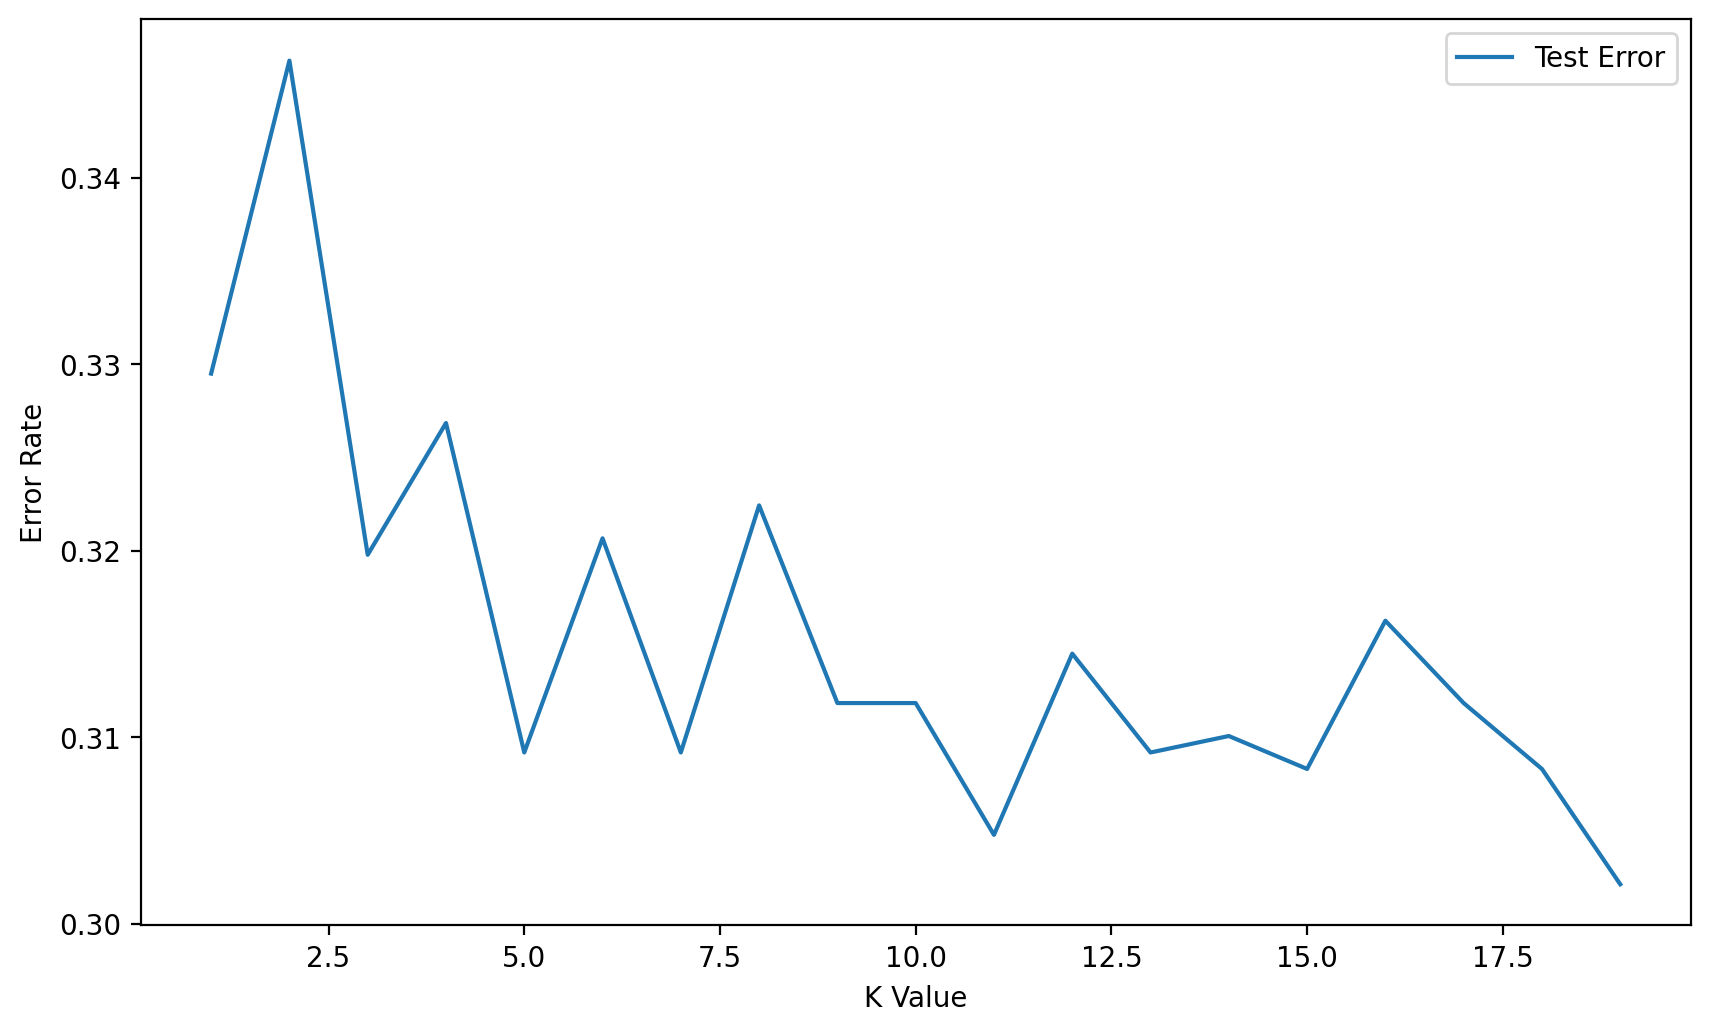

In [200]:
knn_function(X,y)

{'bootstrap': True, 'max_features': 4, 'n_estimators': 34}
              precision    recall  f1-score   support

   Apartment       0.70      0.74      0.72       523
       House       0.77      0.73      0.75       609

    accuracy                           0.74      1132
   macro avg       0.74      0.74      0.74      1132
weighted avg       0.74      0.74      0.74      1132

0.7541666666666667


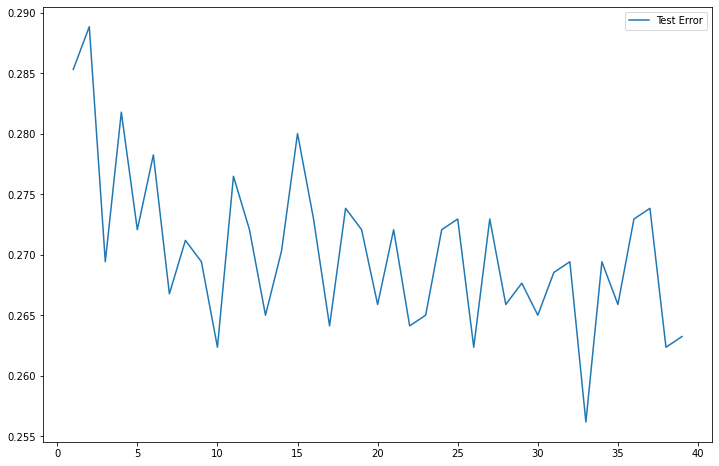

In [201]:
randomforest(X,y)

0.769434628975265
              precision    recall  f1-score   support

   Apartment       0.76      0.73      0.75       523
       House       0.78      0.80      0.79       609

    accuracy                           0.77      1132
   macro avg       0.77      0.77      0.77      1132
weighted avg       0.77      0.77      0.77      1132



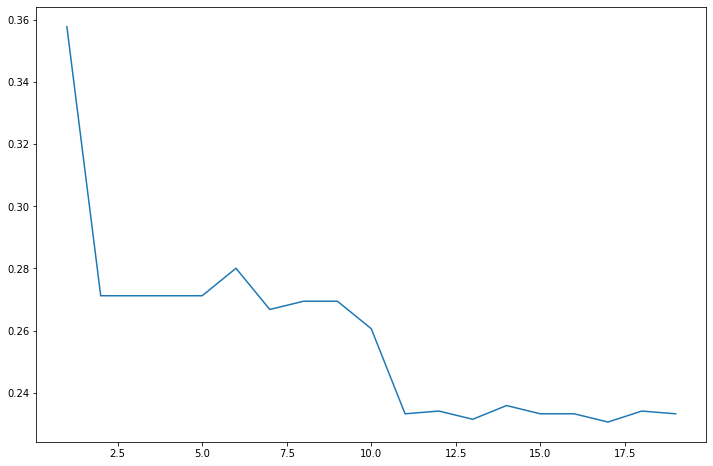

In [222]:
adaboost_function(X,y)

# 

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

In [204]:
final_model = GradientBoostingClassifier(n_estimators=40,max_depth=4,random_state=101)

In [205]:
X = df_v[['host_total_listings_count', 'bedrooms', 'Price', 'room_type_Private room']]
y = df_v['property_type']

In [206]:
final_model.fit(X,y)

GradientBoostingClassifier(max_depth=4, n_estimators=40, random_state=101)

In [207]:
import joblib

In [208]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [209]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

In [210]:
model = joblib.load("final_model.pkl") 

# ATTENTION

In [211]:
dfurl.columns

Index(['listing_url', 'picture_url', 'host_is_superhost',
       'host_total_listings_count', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'number_of_reviews', 'instant_bookable',
       'cancellation_policy', 'host_response_time', 'availability_365',
       'Price', 'property_type'],
      dtype='object')

In [212]:
dfurl.drop(columns=['host_is_superhost','room_type', 'host_response_time','bed_type', 'number_of_reviews',
                    'instant_bookable','cancellation_policy', 'host_response_time', 'availability_365'],inplace=True)

In [213]:
a = model.predict([[1,2,20,0]])

In [216]:
if a == 'Apartment':
    result = print(dfurl[dfurl['property_type'] == 'Apartment'][:3])
else:
    result = print(dfurl[dfurl['property_type'] == 'House'][:3])

    
userinput = input("To view results, Type Yes or Type No to exit")
if userinput == 'Yes':
    result


                            listing_url  \
0   https://www.airbnb.com/rooms/241032   
1   https://www.airbnb.com/rooms/953595   
3  https://www.airbnb.com/rooms/7421966   

                                         picture_url  \
0  https://a1.muscache.com/ac/pictures/67560560/c...   
1  https://a0.muscache.com/ac/pictures/14409893/f...   
3  https://a0.muscache.com/ac/pictures/94146944/6...   

   host_total_listings_count  accommodates  bathrooms  bedrooms  beds  Price  \
0                        3.0             4        1.0       1.0   1.0   85.0   
1                        6.0             4        1.0       1.0   1.0  150.0   
3                        1.0             3        1.0       0.0   2.0  100.0   

  property_type  
0     Apartment  
1     Apartment  
3     Apartment  
To view results, Type Yes or Type No to exitYes
